In [1]:
import pandas as pd
from utils import config

from sklearn.model_selection import train_test_split

# config.xls_path = '../Train-Data/Mix6_mainCat_20/pro_review.xlsx'
# config.xls_path = '/home/eagleuser/Users/leyan/Train-Data/Mix6_mainCat_new/pro_review.xlsx'
total_df = pd.read_excel(config.xls_path)
# total_df = total_df[total_df['review_len']>=50]
# total_df = total_df[total_df['summary_len']>=5]
total_df = total_df.sort_values(by=['review_len','overlap'], ascending = False)
train_df, val_df = train_test_split(total_df, test_size=0.1, 
                                    random_state=0, shuffle=True)

print(len(total_df))
print(len(train_df))
print(len(val_df))

# train : 504075(90%),    test : 56009(10%) -> best 566084

560084
504075
56009


In [2]:
def longest_common_subsequence(main_string, comparing_string):

#     main_string = main_string.split(" ")
#     comparing_string = comparing_string.split(" ")
    columns_length = len(main_string)  # Get the length of the first word or base word
    rows_length = len(comparing_string)  # Get the length of the second word or comparing word

    # MAKE A 2D LIST (MATRIX)
    dynamic_table = [[0] * (columns_length + 1) for i in range(rows_length + 1)]

    # rows_length = NUMBER OF ROWS
    # columns_length = NUMBER OF COLUMNS
    
    # FILL THE MATRIX FOLLOWING LCS ALGORITHM.
    for i in range(1, rows_length + 1):
        for j in range(1, columns_length + 1):
            if main_string[j - 1] == comparing_string[i - 1]:
                dynamic_table[i][j] = 1 + dynamic_table[i - 1][j - 1]

            else:
                dynamic_table[i][j] = max(dynamic_table[i - 1][j], dynamic_table[i][j - 1])

#     print("MATRIX ACCORDING TO LONGEST COMMON SUBSEQUENCE ALGORITHM: \n ")

    # for i in range(rows_length + 1):
    #     print(dynamic_table[i])

    #print("LENGTH OF LONGEST COMMON SUBSEQUENCE = ", dynamic_table[rows_length][columns_length])

    len_lcs = dynamic_table[rows_length][columns_length]

    i = len(comparing_string)
    j = len(main_string)

    lcs_string = str()

    # BACKTRACKING TO FIND THE LONGEST COMMON SUBSEQUENCE

    temp = True

    while temp is True:
        if dynamic_table[i][j] == 0:
            temp = False
        elif dynamic_table[i][j] == dynamic_table[i][j - 1]:
            j = j - 1

        else:
            lcs_string = main_string[j-1] + " " + lcs_string
            i = i - 1
            j = j - 1

    return lcs_string, len_lcs

In [3]:
# df.loc[i,'token_lcs'] = token_lcs
#             df.loc[i,'len_lcs'] = len_lcs
#             df.loc[i,'percent_lcs'] = percent_lcs
#             df.loc[i,'overlap_pos'] = overlap_pos
            
#             df.loc[i,'reveiw_len'] = len(rev_tokens)
#             df.loc[i,'summary_len'] = len(summary_tokens)

In [4]:
#%%
from tqdm import tqdm
from copy import deepcopy
def analay(df, mode):
    df['token_lcs'] = 0
    df['len_lcs'] = 0
    df['percent_lcs'] = 0
    df['overlap_pos'] = 0

    df['reveiw_len'] = 0
    df['summary_len'] = 0
#     df = df[:100]
    with tqdm(total=len(df)) as pbar:
        for i ,row in df.iterrows():       
            overlap_pos = None

            rev, summary = row['review'], row['summary']
            rev_tokens, summary_tokens = rev.split(" "), summary.split(" ")           
            token_lcs, len_lcs = longest_common_subsequence(rev_tokens, summary_tokens)
            percent_lcs = len_lcs / len(summary_tokens) * 100 # percent

            rev_sents = rev.split(" . ")
            overlap_sents = {idx: longest_common_subsequence(sent.split(" "), summary_tokens) for idx, sent in enumerate(rev_sents)}
            sort_overlap_sent = {k:v for k,v in sorted(overlap_sents.items(), key= lambda item: item[1], reverse=True)}
            overlap_sent_id = list(sort_overlap_sent.items())[0][0]

            if (overlap_sent_id == 0) and (percent_lcs >= 20): overlap_pos = 0 # overlap_Top 
            elif (overlap_sent_id == len(rev_tokens)-1) and (percent_lcs >= 20): overlap_pos = 1 # overlap_Final 
            elif (percent_lcs >= 20): overlap_pos = 2 # overlap_other 
            else: overlap_pos = -1 # no overlap 

            df.loc[i,'token_lcs'] = token_lcs
            df.loc[i,'len_lcs'] = len_lcs
            df.loc[i,'percent_lcs'] = percent_lcs
            df.loc[i,'overlap_pos'] = overlap_pos
            
            df.loc[i,'reveiw_len'] = len(rev_tokens)
            df.loc[i,'summary_len'] = len(summary_tokens)

            pbar.update(1)
            pbar.set_description("%s row: %s | overlap_pos: %s (%2.2f)percent| len_lcs: %s" % (mode, i, overlap_pos, percent_lcs, len_lcs))
#     df = df[df['token_lcs']!=0]
    return df



In [5]:
train_df.head()

,Unnamed: 0,review,summary,cheat,cheat_num,review_len,summary_len,POS_keys,DEP_keys,Noun_adj_keys,...,overlap,binaryrating,vote,token_lcs,len_lcs,percent_lcs,overlap_pos,summary_polarity,summary_subjectivity,reveiw_len
164361,164361,after month read review and news finally purch...,<s> with the right lens almost as portable as ...,"{'right', 'lens', 'shoot', 'point'}",1,619,13,"['good', 'deal', 'aspherical', 'pancake', 'len...","['good', 'review', 'deal', 'purchase', 'wait',...","['review', 'deal', 'wait', 'news', 'couple', '...",...,NaN,NaN,NaN,the the lens point and shoot shoot,7,53.846154,2,the the lens point and shoot shoot,0.535714,619
437736,437736,system fail once . restore the system have dow...,<s> system fail once to restore the system hav...,"{'restore', 'fail', 'system'}",1,40,10,"['', 'system', 'restore', 'free', 'trial', 'me...","['fail', 'system', 'download', 'system', 'rest...","['month', 'trial', 'pay', 'software', 'free']",...,NaN,NaN,NaN,system fail once restore the system have,7,70.000000,2,system fail once restore the system have,0.300000,40
330010,330010,love the soft feel this fleece . also the perf...,<s> love the soft feel of this fleece </s>,"{'love', 'fleece', 'feel', 'soft'}",2,43,9,"['feel', 'soft', 'perfect', 'cool', 'amount', ...","['feel', 'soft', 'day', 'perfect', 'warmth', '...","['feel', 'soft', 'day', 'amount', 'warmth', 'c...",...,NaN,NaN,NaN,love the soft feel this fleece,6,66.666667,2,love the soft feel this fleece,0.475000,43
326457,326457,this the third progressive set buy for grandso...,<s> these are real club and great value do not...,"{'great', 'fool', 'club', 'number', 'real'}",1,40,17,"['set', 'progressive', 'buy', '', 'real', 'val...","['third', 'set', 'progressive', 'buy', 'real',...","['set', 'progressive', 'value', 'club', 'real'...",...,NaN,NaN,NaN,these are real club and great value fool the n...,10,58.823529,2,these are real club and great value fool the n...,0.525000,40
43583,43583,div class div input type hide name value class...,<s> good little frame for the price </s>,"{'price', 'frame', 'good'}",1,135,8,"['photo', 'little', 'frame', 'easy', 'maneuver...","['little', 'good', 'frame', 'menu', 'maneuver'...","['class', 'hide', 'name', 'div', 'nbsp', 'inpu...",...,NaN,NaN,NaN,good little frame for price,5,62.500000,2,good little frame for price,0.550000,135


In [6]:
val_df.head()

,Unnamed: 0,review,summary,cheat,cheat_num,review_len,summary_len,POS_keys,DEP_keys,Noun_adj_keys,...,overlap,binaryrating,vote,token_lcs,len_lcs,percent_lcs,overlap_pos,summary_polarity,summary_subjectivity,reveiw_len
361033,361033,four and half handy star the sleek black porta...,<s> oxa mah charger is versatile quick charge ...,"{'dual', 'port', 'mah', 'oxa', 'device', 'char...",0,235,12,"['star', 'usb', 'plastic', 'power', 'charger',...","['charge', 'star', 'black', 'plastic', 'charge...","['half', 'star', 'mah', 'plastic', 'charger', ...",...,NaN,NaN,NaN,oxa mah charger dual port device device,7,58.333333,2,oxa mah charger dual port device device,0.500000,235
341766,341766,buy this bag august and have abuse ever since ...,<s> the zipper are sturdy too and have not hav...,"{'issue', 'zipper', 'sturdy'}",2,84,14,"['bag', 'buy', 'well', 'bottom', 'small', 'kee...","['abuse', 'bag', 'have', 'buy', 'material', 'u...","['material', 'bag', 'other', 'durable', 'hole'...",...,NaN,NaN,NaN,the and have sturdy too and any issue there,9,64.285714,2,the and have sturdy too and any issue there,0.000000,84
546296,546296,this product has high quality ingredient the r...,<s> high quality ingredient that my cat love w...,"{'love', 'filler', 'high', 'cat', 'find', 'bra...",1,514,17,"['include', 'product', 'ingredient', 'quality'...","['include', 'product', 'bad', 'ingredient', 'q...","['product', 'ingredient', 'quality', 'right', ...",...,NaN,NaN,NaN,high quality ingredient the filler the the fin...,11,64.705882,2,high quality ingredient the filler the the fin...,0.503750,514
302063,302063,this does not fit inch tire . the longest the ...,<s> everything now work perfect and the sparet...,"{'rack', 'work', 'perfect', 'fit', 'modificati...",2,50,15,"['fit', 'inch', '', 'bracket', 'middle', 'perf...","['fit', 'tire', 'inch', 'bracket', 'middle', '...","['bracket', 'measure', 'inch', 'short', 'brack...",...,NaN,NaN,NaN,everything now work perfect and the sparetime ...,13,86.666667,2,everything now work perfect and the sparetime ...,0.800000,50
123757,123757,alert are false . alert are late . subject mis...,<s> subject miss quality for the camera and se...,"{'setup', 'camera', 'alert', 'easy', 'ton', 's...",3,80,20,"['', '', '', 'false', 'alert', '', 'subject', ...","['false', 'alert', 'are', 'alert', 'are', 'lat...","['alert', 'false', 'alert', 'late', 'miss', 'e...",...,NaN,NaN,NaN,subject miss quality for the camera and setup ...,16,80.000000,2,subject miss quality for the camera and setup ...,0.566667,80


In [7]:
import os

if os.path.exists('Analay/train_df.xlsx'):
    p_train_df = pd.read_excel('Analay/train_df.xlsx')
    p_val_df = pd.read_excel('Analay/val_df.xlsx')
else:    
    p_train_df = analay(deepcopy(train_df), 'train')
    p_train_df.to_excel('Analay/train_df.xlsx', encoding='utf8')

    p_val_df = analay(deepcopy(val_df), 'test')
    p_val_df.to_excel('Analay/val_df.xlsx', encoding='utf8')

In [8]:
p_train_df.describe()

,cheat_num,review_len,summary_len,Noun_adj_keys,overlap,binaryrating,vote,len_lcs,percent_lcs,overlap_pos,reveiw_len
count,504075.000000,504075.000000,504075.000000,0.0,0.0,0.0,0.0,504075.000000,504075.000000,504075.000000,504075.000000
mean,1.201198,133.084476,12.504762,NaN,NaN,NaN,NaN,6.899703,54.537976,1.408953,133.084476
std,0.895447,131.237904,3.672741,NaN,NaN,NaN,NaN,3.277162,17.180264,0.928711,131.237904
min,0.000000,20.000000,5.000000,NaN,NaN,NaN,NaN,1.000000,5.555556,-1.000000,20.000000
25%,1.000000,51.000000,10.000000,NaN,NaN,NaN,NaN,4.000000,40.000000,0.000000,51.000000
50%,1.000000,89.000000,12.000000,NaN,NaN,NaN,NaN,6.000000,55.555556,2.000000,89.000000
75%,2.000000,163.000000,14.000000,NaN,NaN,NaN,NaN,9.000000,69.230769,2.000000,163.000000
max,7.000000,1000.000000,61.000000,NaN,NaN,NaN,NaN,49.000000,92.857143,2.000000,1000.000000


In [9]:
import matplotlib.pyplot as plt
print('reveiw_len < 30 :',len(p_train_df[p_train_df['reveiw_len']<30]))
print('reveiw_len > 500 :',len(p_train_df[p_train_df['reveiw_len']>=500])) # # max pos, max_enc_steps 
s = p_train_df['reveiw_len'].describe(); print(s)
s = s.drop(labels = ['count'])
s.plot.bar()
plt.ylabel('length')
plt.title('reveiw_len')
plt.show()

reveiw_len < 30 : 37857
reveiw_len > 500 : 14196
count    504075.000000
mean        133.084476
std         131.237904
min          20.000000
25%          51.000000
50%          89.000000
75%         163.000000
max        1000.000000
Name: reveiw_len, dtype: float64


<Figure size 640x480 with 1 Axes>

summary_len > 30 : 162
summary_len <= 5 : 24
count    504075.000000
mean         12.504762
std           3.672741
min           5.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          61.000000
Name: summary_len, dtype: float64


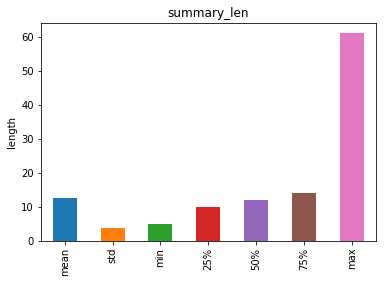

In [10]:
print('summary_len > 30 :',len(p_train_df[p_train_df['summary_len']>30]))  # max_dec_steps
print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps

s = p_train_df['summary_len'].describe(); print(s)
s = s.drop(labels = ['count'])
s.plot.bar()
plt.ylabel('length')
plt.title('summary_len')
plt.show()

# Prune data length

In [11]:
print('reveiw_len <= 500 and summary_len<= 20:',len(p_train_df[
    (p_train_df['reveiw_len']<=500) & (p_train_df['summary_len']<=20)                                        
                                        ]))

print('reveiw_len <= 500 and summary_len<= 20:',len(p_val_df[
    (p_val_df['reveiw_len']<=500) & (p_val_df['summary_len']<=20)                                        
                                        ]))
# print('reveiw_len > 7000 :',len(p_train_df[p_train_df['reveiw_len']>=700])) # # max pos, max_enc_steps 
# s = p_train_df['reveiw_len'].describe(); print(s)
# s = s.drop(labels = ['count'])
# s.plot.bar()
# plt.ylabel('length')
# plt.title('reveiw_len')
# plt.show()

reveiw_len <= 500 and summary_len<= 20: 469335
reveiw_len <= 500 and summary_len<= 20: 52149


# percent_lcs EDA(20 divided)

count    504075.000000
mean         54.537976
std          17.180264
min           5.555556
25%          40.000000
50%          55.555556
75%          69.230769
max          92.857143
Name: percent_lcs, dtype: float64


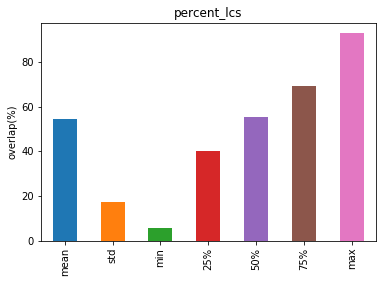

percent_lcs x < 20 :0.99 %
percent_lcs 20 < x < 40 :20.54 %
percent_lcs 40 < x < 60 :30.09 %
percent_lcs 60 < x < 80 :34.24 %
percent_lcs x > 80  :4.38 %


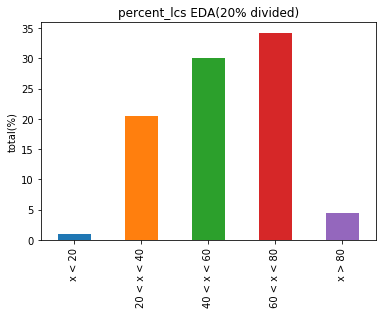

In [12]:
# 统计学上的四分为函数
# 原则上p是可以取0到1之间的任意值的。但是有一个四分位数是p分位数中较为有名的。

# 所谓四分位数；即把数值由小到大排列并分成四等份，处于三个分割点位置的数值就是四分位数。

# 第1四分位数 (Q1)，又称“较小四分位数”，等于该样本中所有数值由小到大排列后第25%的数字。
# 第2四分位数 (Q2)，又称“中位数”，等于该样本中所有数值由小到大排列后第50%的数字。
# 第3四分位数 (Q3)，又称“较大四分位数”，等于该样本中所有数值由小到大排列后第75%的数字。
# 第3四分位数与第1四分位数的差距又称四分位距（InterQuartile Range,IQR）

s = p_train_df['percent_lcs'].describe(); print(s)
s = s.drop(labels = ['count'])
s.plot.bar()
plt.ylabel('overlap(%)')
plt.title('percent_lcs')
plt.show()

print('percent_lcs x < 20 :%.2f' % float(len(p_train_df[p_train_df['percent_lcs']<20])/len(p_train_df)*100),'%' )  # overlap percent with summary
print('percent_lcs 20 < x < 40 :%.2f' % float( \
      len(p_train_df[(p_train_df['percent_lcs']>20) & (p_train_df['percent_lcs']<40)])/len(p_train_df)*100),'%')  # max_dec_steps
print('percent_lcs 40 < x < 60 :%.2f' % float( \
      len(p_train_df[(p_train_df['percent_lcs']>40) & (p_train_df['percent_lcs']<60)])/len(p_train_df)*100),'%')  # max_dec_steps
print('percent_lcs 60 < x < 80 :%.2f' % float( \
      len(p_train_df[(p_train_df['percent_lcs']>60) & (p_train_df['percent_lcs']<80)])/len(p_train_df)*100),'%')  # max_dec_steps
print('percent_lcs x > 80  :%.2f' % float( \
      len(p_train_df[(p_train_df['percent_lcs']>80)])/len(p_train_df)*100),'%')  # max_dec_steps


s = pd.Series({'x < 20':len(p_train_df[p_train_df['percent_lcs']<20])/len(p_train_df)*100, 
           '20 < x < 40':len(p_train_df[(p_train_df['percent_lcs']>20) & (p_train_df['percent_lcs']<40)])/len(p_train_df)*100, 
           '40 < x < 60':len(p_train_df[(p_train_df['percent_lcs']>40) & (p_train_df['percent_lcs']<60)])/len(p_train_df)*100, 
           '60 < x < 80':len(p_train_df[(p_train_df['percent_lcs']>60) & (p_train_df['percent_lcs']<80)])/len(p_train_df)*100, 
           'x > 80':len(p_train_df[p_train_df['percent_lcs']>80])/len(p_train_df)*100          
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.title('percent_lcs EDA(20% divided)')
plt.show()

In [13]:
'''
overlap => lcs > (20% summary len)
overlap_pos : 0 Top
overlap_pos : 1 Final
overlap_pos : 2 Other Pos
overlap_pos : -1 No overlap
'''

# print('overlap Top : %2.2f'% float(len(p_train_df[p_train_df['overlap_pos'] == 0])/len(p_train_df)*100),'%') 
# print('overlap Final :%2.2f'% float(len(p_train_df[p_train_df['overlap_pos'] == 1])/len(p_train_df)*100),'%') 
# print('overlap Other Pos :%2.2f'% float(len(p_train_df[p_train_df['overlap_pos'] == 2])/len(p_train_df)*100),'%')
# print('No overlap :%2.2f'% float(len(p_train_df[p_train_df['overlap_pos'] == -1])/len(p_train_df)*100),'%') 

# s = pd.Series({'overlap Top':len(p_train_df[p_train_df['overlap_pos'] == 0])/len(p_train_df)*100, 
#            'overlap Final':len(p_train_df[p_train_df['overlap_pos'] == 1])/len(p_train_df)*100, 
#            'overlap Other Pos':len(p_train_df[p_train_df['overlap_pos'] == 2])/len(p_train_df)*100, 
#            'No overlap':len(p_train_df[p_train_df['overlap_pos'] == -1])/len(p_train_df)*100, 
#           })
# print(s)
# s.plot.bar()
# plt.ylabel('overlap(%)')
# plt.title('percent_lcs')
# plt.show()

'\noverlap => lcs > (20% summary len)\noverlap_pos : 0 Top\noverlap_pos : 1 Final\noverlap_pos : 2 Other Pos\noverlap_pos : -1 No overlap\n'

# Ext/Abs分界(50)

percent_lcs x > 50  55.73 %
percent_lcs x <= 50  44.27 %


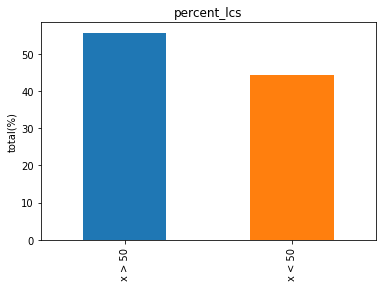

In [14]:
print('percent_lcs x > 50  %2.2f'% float(len(p_train_df[(p_train_df['percent_lcs']>50)])/len(p_train_df)*100),'%')  # max_dec_steps
print('percent_lcs x <= 50  %2.2f'% float(len(p_train_df[(p_train_df['percent_lcs']<=50)])/len(p_train_df)*100),'%')  # max_dec_steps

s = pd.Series({'x > 50':len(p_train_df[(p_train_df['percent_lcs']>50)])/len(p_train_df)*100, 
           'x < 50':len(p_train_df[(p_train_df['percent_lcs']<=50)])/len(p_train_df)*100,      
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.title('percent_lcs')
plt.show()

overlap Top :18.54 %
overlap Final :0.00 %
overlap Other Pos :37.20 %
No overlap :44.27 %


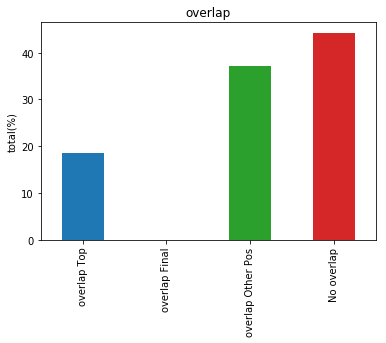

In [15]:
'''
overlap => percent_lcs > (50% summary len)
overlap_pos : 0 Top
overlap_pos : 1 Final
overlap_pos : 2 Other Pos
overlap_pos : -1 No overlap
'''

print('overlap Top :%2.2f'% float(len(p_train_df[(p_train_df['overlap_pos'] == 0) & (p_train_df['percent_lcs']>50)])/len(p_train_df)*100),'%') 
print('overlap Final :%2.2f'% float(len(p_train_df[(p_train_df['overlap_pos'] == 1) & (p_train_df['percent_lcs']>50)])/len(p_train_df)*100),'%') 
print('overlap Other Pos :%2.2f'% float(len(p_train_df[(p_train_df['overlap_pos'] == 2) & (p_train_df['percent_lcs']>50)])/len(p_train_df)*100),'%') 
print('No overlap :%2.2f'% float(len(p_train_df[(p_train_df['percent_lcs']<=50)])/len(p_train_df)*100),'%') 

s = pd.Series({'overlap Top':len(p_train_df[(p_train_df['overlap_pos'] == 0) & (p_train_df['percent_lcs']>50)])/len(p_train_df)*100, 
           'overlap Final':len(p_train_df[(p_train_df['overlap_pos'] == 1) & (p_train_df['percent_lcs']>50)])/len(p_train_df)*100,      
           'overlap Other Pos':len(p_train_df[(p_train_df['overlap_pos'] == 2) & (p_train_df['percent_lcs']>50)])/len(p_train_df)*100,  
           'No overlap':len(p_train_df[(p_train_df['percent_lcs']<=50)])/len(p_train_df)*100,  
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.title('overlap')
plt.show()

In [16]:
def view(df, condition, view_num=10):
    package_dict = []
    for i in range(view_num):
        d1 = dict(p_train_df[eval(condition)].iloc[i])
        d2 = {'review':d1['review'],
              'summary':d1['summary'],
              'token_lcs':d1['token_lcs'],
              'overlap':d1['overlap'],
              'percent_lcs':d1['percent_lcs'],
              'keywords':d1['POS_keys']            
             }
        package_dict.append(d2)
    return package_dict
        
# view(p_train_df, "(p_train_df['overlap_pos'] == 2) & (p_train_df['percent_lcs']<50)")
view(p_train_df, "(p_train_df['review_len']<=50) & (p_train_df['percent_lcs']<=40) & (p_train_df['summary_len']>=15)")

[{'review': 'after use this new hatchet put axe wich need substantial correction . use the axe the cutting speed the rough git side was diminish would fast the smother git side . the load the coarse side substantial . even flatten the coarse side try remove the load and work .',
  'summary': '<s> load up fast and can not remove the load up do not buy </s>',
  'token_lcs': 'the the load load ',
  'overlap': nan,
  'percent_lcs': 26.66666666666667,
  'keywords': 'correction substantial,git rough,side coarse,side coarse,load remove'},
 {'review': 'well the mini was nice you can zoom anyway with just the 9 mm lens but unfortunately you can nt once find out there zoom feature want play with because zoom major feature you need have camera without useless right . return immediately .',
  'summary': '<s> there is no zoom you have to get the mm lens to be able to zoom </s>',
  'token_lcs': 'the the mm lens zoom ',
  'overlap': nan,
  'percent_lcs': 27.77777777777778,
  'keywords': 'feature majo

In [17]:
dict(p_train_df[(p_train_df['overlap_pos'] == 2) & (p_train_df['percent_lcs']>50)].iloc[0:10])['summary']

164361    <s> with the right lens almost as portable as ...
437736    <s> system fail once to restore the system hav...
330010           <s> love the soft feel of this fleece </s>
326457    <s> these are real club and great value do not...
43583              <s> good little frame for the price </s>
56513     <s> lose connection in the middle of file tran...
418312    <s> love the design so purchased from the manu...
468145    <s> it is very pretty and look good in the hou...
204762    <s> okay overall but not wide enough for bench...
21372                 <s> not the lens thought was buy </s>
Name: summary, dtype: object